<a href="https://colab.research.google.com/github/mlacasa/EstadisticaQ2/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

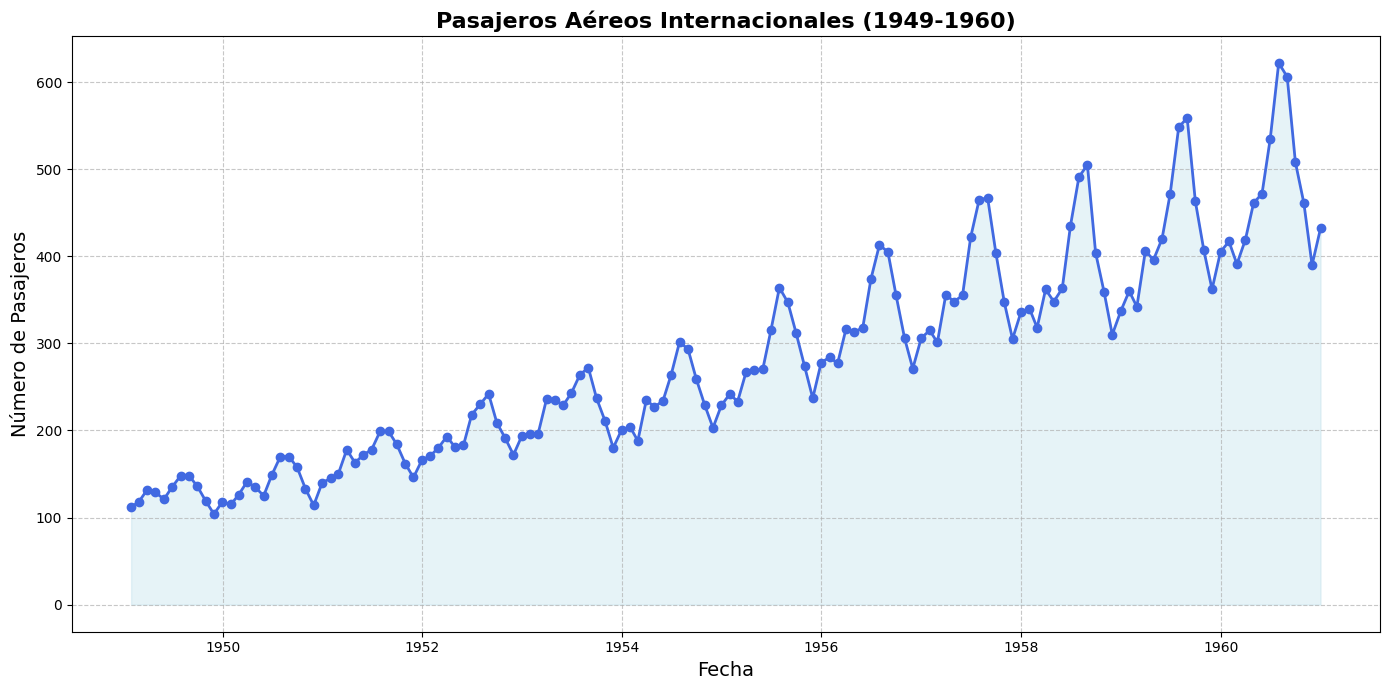

In [27]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 1. Cargar el conjunto de datos
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data

# 2. Convertir la columna 'time' a formato de fecha correcta
# Crear una fecha que represente el final de cada mes.
df['Month'] = pd.date_range(start='1949-01-01', periods=len(df), freq='ME')

# 3. Establecer la columna 'Month' como índice
df.set_index('Month', inplace=True)

# 4. Renombrar la columna 'value' a 'Passengers'
df = df[['value']].rename(columns={'value': 'Passengers'})

# 5. Visualizar la serie temporal
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Passengers'], color='royalblue', marker='o', linestyle='-', linewidth=2)
plt.fill_between(df.index, df['Passengers'], color='lightblue', alpha=0.3)

# Configuración de la titulación
plt.title('Pasajeros Aéreos Internacionales (1949-1960)', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de Pasajeros', fontsize=14)

# Mejorar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

In [28]:
df.head()

,Passengers
Month,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


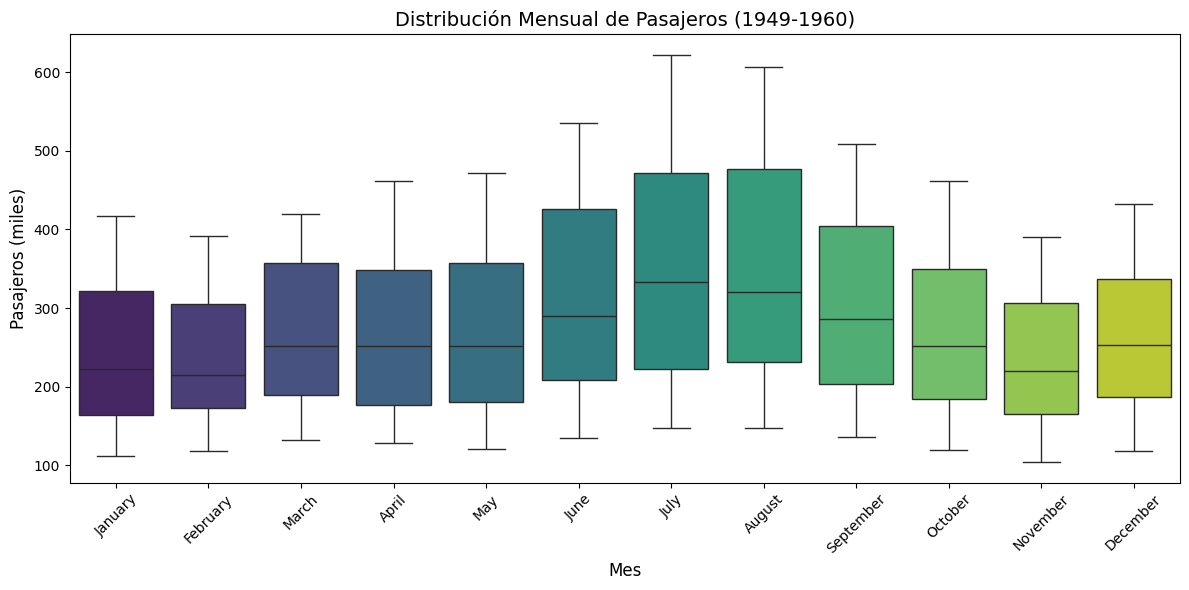

In [13]:
#%% 3. Boxplot mensual
df['Mes'] = df.index.month_name()
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, hue='Mes', x='Mes', y='Passengers', palette='viridis')
plt.title('Distribución Mensual de Pasajeros (1949-1960)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Pasajeros (miles)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

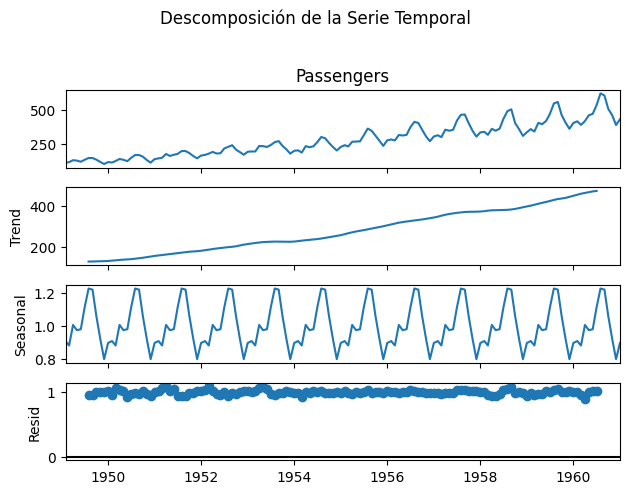

In [14]:
#%% 4. Explicación estacionalidad y tendencia (texto)
"""
**Componentes de la serie temporal:**

1. **Tendencia ($T_t$):**
   Observamos un crecimiento constante a lo largo de los años, indicando aumento de demanda en transporte aéreo.

2. **Estacionalidad ($S_t$):**
   Patrón anual recurrente: picos en verano y valles en invierno (visible en boxplot mensual).

3. **Residual ($R_t$):**
   Variabilidad no explicada por tendencia o estacionalidad
"""

#%% 5. Descomposición de la serie temporal
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
plt.figure(figsize=(12, 8))

result.plot()
plt.suptitle('Descomposición de la Serie Temporal', y=1.02)
plt.tight_layout()
plt.show()


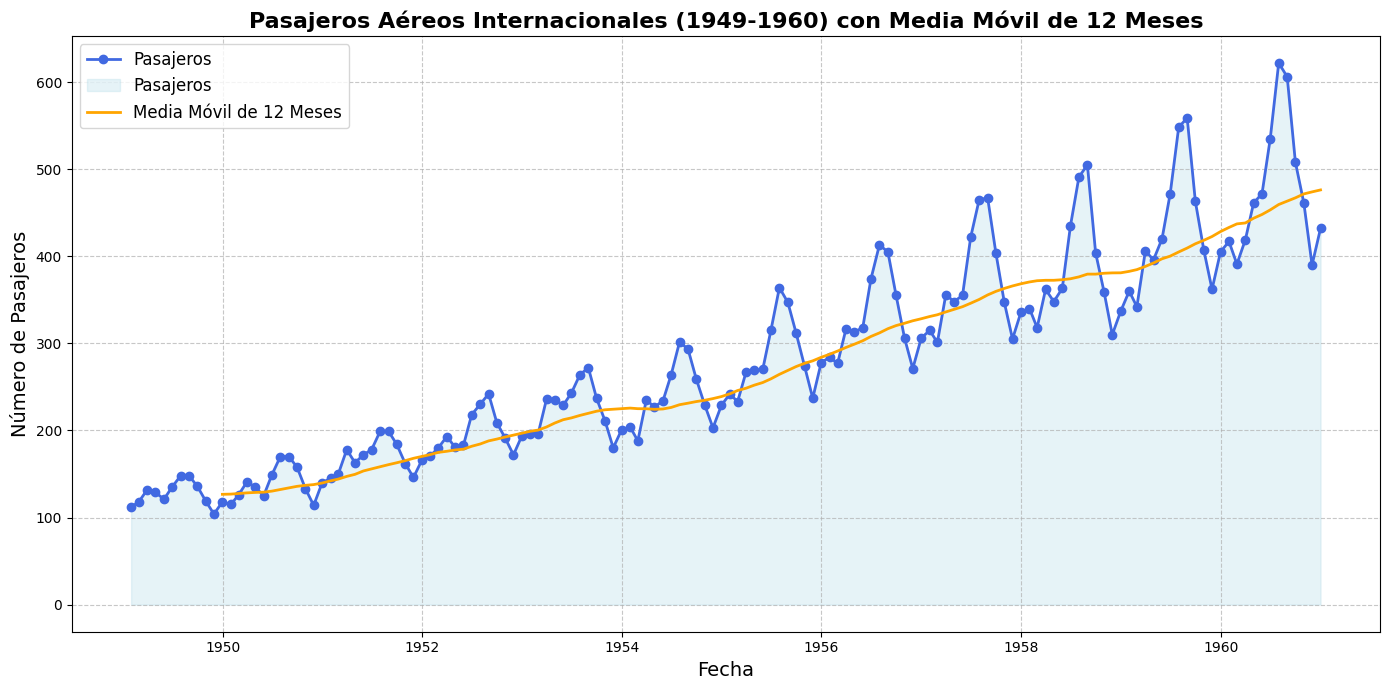

In [17]:
df['Month'] = pd.date_range(start='1949-01-01', periods=len(df), freq='ME')

# 3. Establecer la columna 'Month' como índice
df.set_index('Month', inplace=True)

# 4. Renombrar la columna 'y' a 'Passengers'
# (verificar el nombre correcto de la columna si es diferente)
df = df.rename(columns={'value': 'Passengers'})  # Cambia 'value' según corresponda

# 5. Calcular la media móvil de 12 meses
df['MA_12'] = df['Passengers'].rolling(window=12).mean()

# 6. Visualizar la serie temporal y la media móvil
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Passengers'], color='royalblue', marker='o', linestyle='-', linewidth=2, label='Pasajeros')
plt.fill_between(df.index, df['Passengers'], color='lightblue', alpha=0.3, label='Pasajeros')
plt.plot(df.index, df['MA_12'], color='orange', linewidth=2, label='Media Móvil de 12 Meses')

# Configuración de la titulación
plt.title('Pasajeros Aéreos Internacionales (1949-1960) con Media Móvil de 12 Meses', fontsize=16, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Número de Pasajeros', fontsize=14)

# Mejorar la cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir leyenda
plt.legend(loc='upper left', fontsize=12)

# Ajustar el layout y mostrar el gráfico
plt.tight_layout()
plt.show()

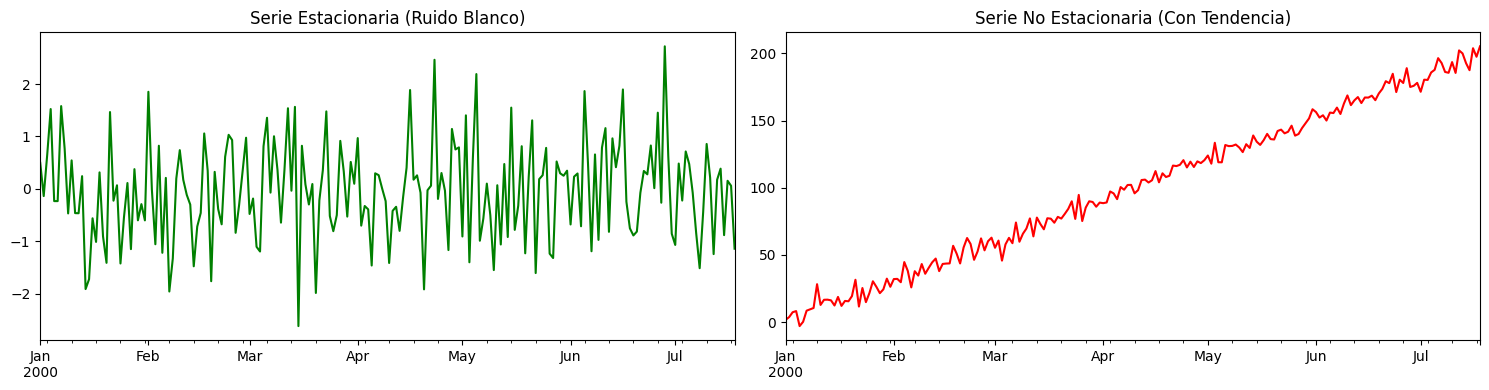

In [18]:
#%% 6. Ejemplos de series estacionarias vs no estacionarias
import numpy as np

# Serie estacionaria (ruido blanco)
np.random.seed(42)
estacionaria = pd.Series(np.random.normal(0, 1, 200),
                        index=pd.date_range(start='2000-01-01', periods=200, freq='D'))

# Serie no estacionaria (con tendencia)
no_estacionaria = pd.Series(np.arange(200) + np.random.normal(0, 5, 200),
                           index=pd.date_range(start='2000-01-01', periods=200, freq='D'))

fig, ax = plt.subplots(1, 2, figsize=(15, 4))
estacionaria.plot(title='Serie Estacionaria (Ruido Blanco)', ax=ax[0], color='green')
no_estacionaria.plot(title='Serie No Estacionaria (Con Tendencia)', ax=ax[1], color='red')
plt.tight_layout()
plt.show()

In [19]:

#%% 7. Test de Dickey-Fuller aumentado
from statsmodels.tsa.stattools import adfuller

def test_estacionariedad(serie):
    resultado = adfuller(serie)
    print(f'Estadístico ADF: {resultado[0]:.4f}')
    print(f'p-valor: {resultado[1]:.4f}')
    print('Valores críticos:')
    for key, value in resultado[4].items():
        print(f'   {key}: {value:.4f}')

print('Test para serie original:')
test_estacionariedad(df['Passengers'])

print('\nTest para serie diferenciada:')
test_estacionariedad(df['Passengers'].diff().dropna())

Test para serie original:
Estadístico ADF: 0.8154
p-valor: 0.9919
Valores críticos:
   1%: -3.4817
   5%: -2.8840
   10%: -2.5788

Test para serie diferenciada:
Estadístico ADF: -2.8293
p-valor: 0.0542
Valores críticos:
   1%: -3.4817
   5%: -2.8840
   10%: -2.5788


In [21]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.4 MB/s eta 0:00:00


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=813.750, Time=1.15 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=910.236, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=810.646, Time=0.25 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=860.575, Time=0.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1060.479, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=809.411, Time=0.07 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=810.721, Time=0.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=812.509, Time=0.55 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=808.863, Time=0.08 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=810.482, Time=0.32 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=810.553, Time=0.19 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.63 sec
 ARIMA(3,0,0)(0,1,0)[12] intercept   : AIC=809.375, Time=0.12 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=809.672, Time=0.13 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept  

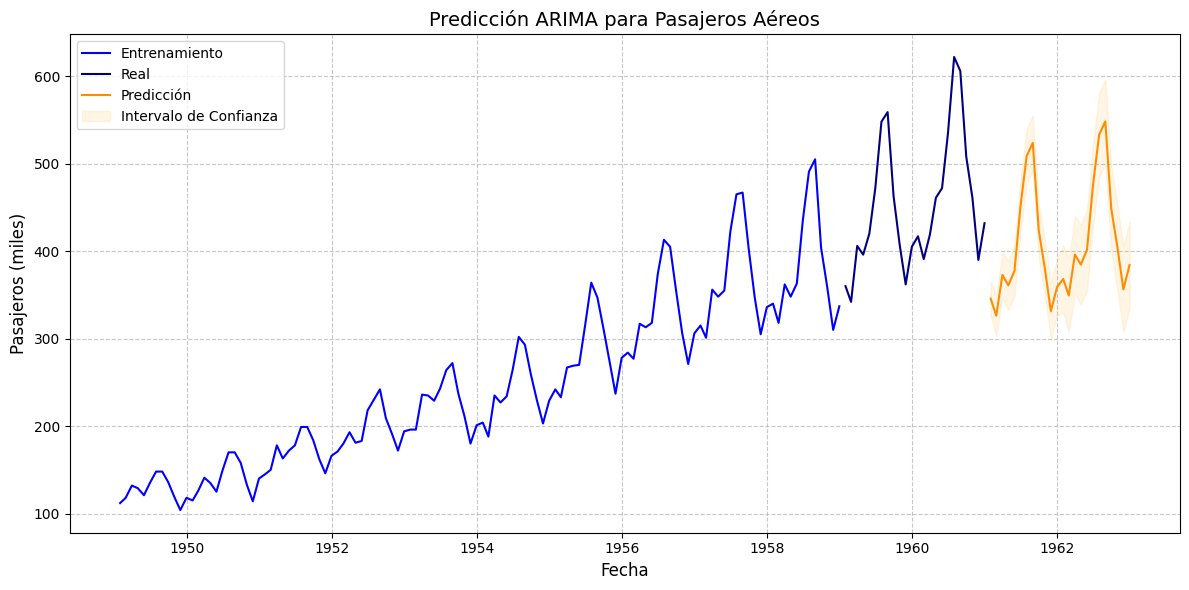

In [26]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from pmdarima import auto_arima
import warnings

# Ignorar advertencias
warnings.filterwarnings("ignore")

# Cargar el conjunto de datos
data = sm.datasets.get_rdataset("AirPassengers")
df = data.data

# Convertir la columna 'time' a formato de fecha correcta
df['Month'] = pd.date_range(start='1949-01-01', periods=len(df), freq='ME')
df.set_index('Month', inplace=True)

# Renombrar la columna a 'Passengers'
df.rename(columns={'value': 'Passengers'}, inplace=True)

# División de datos (últimos 2 años como test)
train = df['Passengers'][:-24]  # Entrenamiento
test = df['Passengers'][-24:]     # Prueba

# Búsqueda automática de mejores parámetros
modelo_auto = auto_arima(train, seasonal=True, m=12,
                          suppress_warnings=True,
                          stepwise=True,
                          trace=True)

print(modelo_auto.summary())

# Predicción
predicciones, conf_int = modelo_auto.predict(n_periods=24, return_conf_int=True)

# Crear un rango de fechas para las predicciones
predicciones_index = pd.date_range(start=test.index[-1] + pd.offsets.MonthEnd(1), periods=24, freq='ME')

# Visualización
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Entrenamiento', color='blue')
plt.plot(test.index, test, label='Real', color='navy')
plt.plot(predicciones_index, predicciones, label='Predicción', color='darkorange')

# Llenar el área de confianza
plt.fill_between(predicciones_index,
                 conf_int[:, 0],
                 conf_int[:, 1],
                 color='orange', alpha=0.1, label='Intervalo de Confianza')

# Configuración de la titulación
plt.title('Predicción ARIMA para Pasajeros Aéreos', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Pasajeros (miles)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()